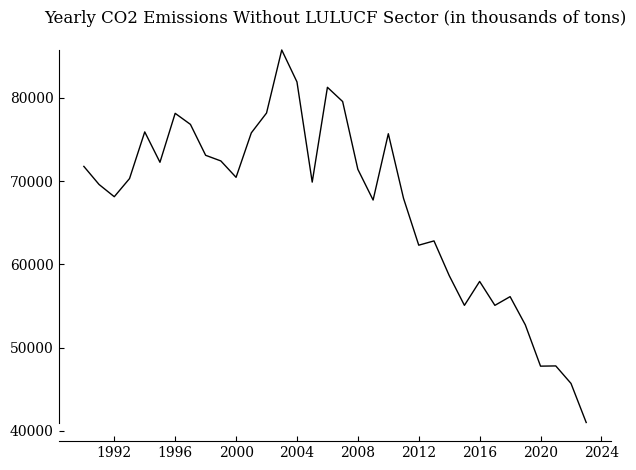

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['font.family'] = 'serif'

# Read CSV
df = pd.read_csv("/home/akupalo/informationviz/data/001_138v_2023_20250312-162058.csv")

# Clean the 'Vuosi' column by removing the asterisk (*)
df['Vuosi'] = df['Vuosi'].str.replace('*', '', regex=False)

# Convert 'Vuosi' to datetime and set as index
df['Vuosi'] = pd.to_datetime(df['Vuosi'], format='%Y')
df.set_index('Vuosi', inplace=True)

# Plot
fig, ax = plt.subplots()
ax.plot(df.index, df['Paasto tuhatta tonnia CO2-ekv. (GWP=AR5)'], linestyle='-', color='black', linewidth=1, zorder=1)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(df['Paasto tuhatta tonnia CO2-ekv. (GWP=AR5)'].min(), df['Paasto tuhatta tonnia CO2-ekv. (GWP=AR5)'].max())

# Format x-axis
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))
ax.tick_params(axis='x')

# Format y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10000))
ax.tick_params(direction='in')

# Set labels and title
#ax.set_xlabel('Year')
#ax.set_ylabel('Emissions (thousand tons CO2-equivalent)')
ax.set_title('Yearly CO2 Emissions Without LULUCF Sector (in thousands of tons)')

plt.tight_layout()
plt.show()